In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [223]:
df = pd.read_csv("1632300362534233.csv")
df['Area'] = df['Area'].str.replace(',', '').astype(float)
df = df.dropna()
len(df)

3456

In [224]:
encode_address = LabelEncoder()
df['Parking'] = encode_address.fit_transform(df['Parking'])

In [225]:
df=df.drop('Price(USD)', axis=1)
df=df.drop('Address', axis=1)

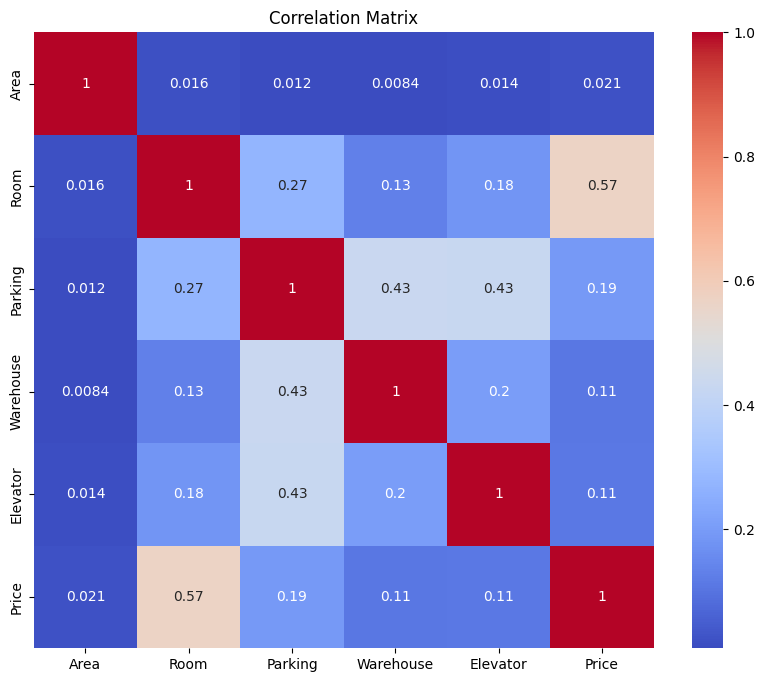

In [226]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#خانم درین تو این هیستوگرام داده هایی که بیشتر مربوط بودو استفاده کردم اول اسانسور و انبارم و ادرسم بود ولی حذف کردم چون خطا خیلی مینداخت ودچار اوور فیت میشد

In [227]:
df = df[df['Area'] <= 350]
len(df['Area'])

3408

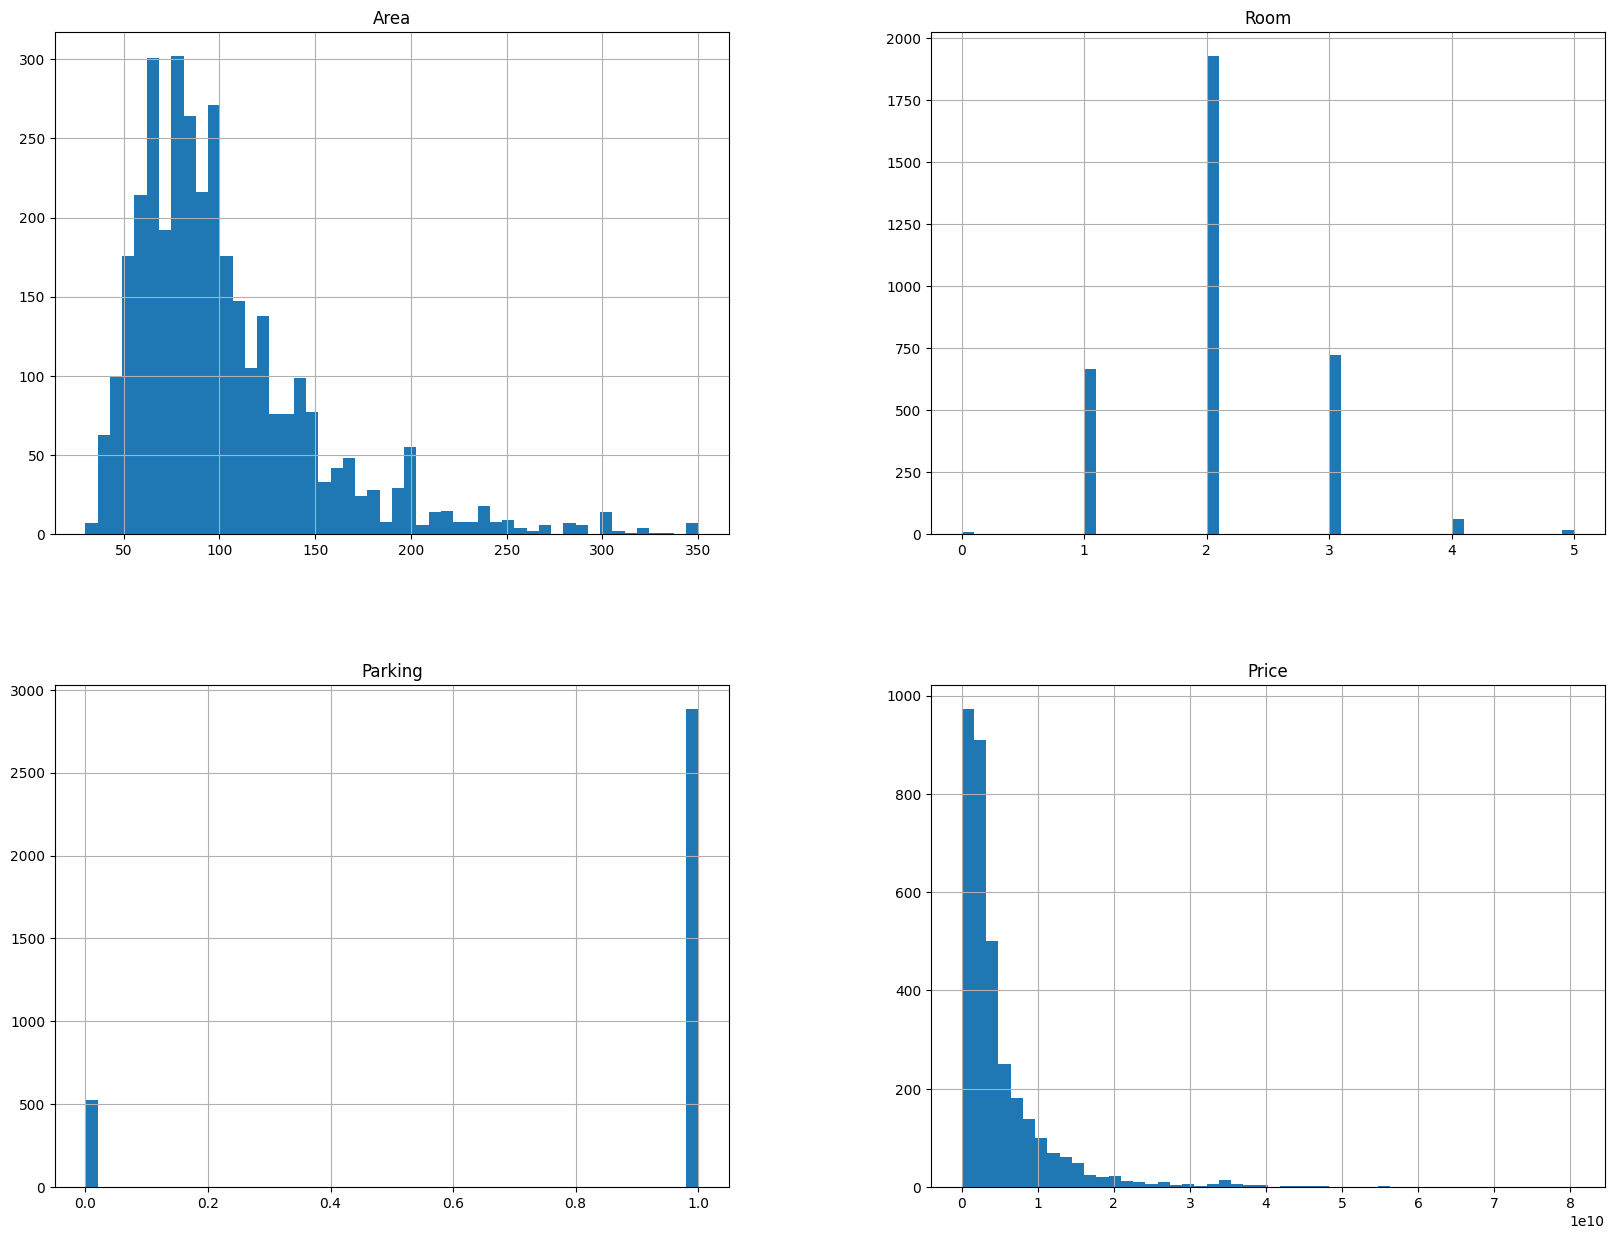

In [228]:
df.hist(bins=50, figsize=(20, 15))
plt.show()


In [229]:
columns_to_normalize = ['Area', 'Room', 'Price']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df.head())

       Area  Room  Parking  Warehouse  Elevator     Price
0  0.103125   0.2        1       True      True  0.022938
1  0.093750   0.2        1       True      True  0.022938
2  0.153125   0.4        1       True      True  0.006788
3  0.203125   0.4        1       True      True  0.011167
4  0.290625   0.4        1       True      True  0.086916


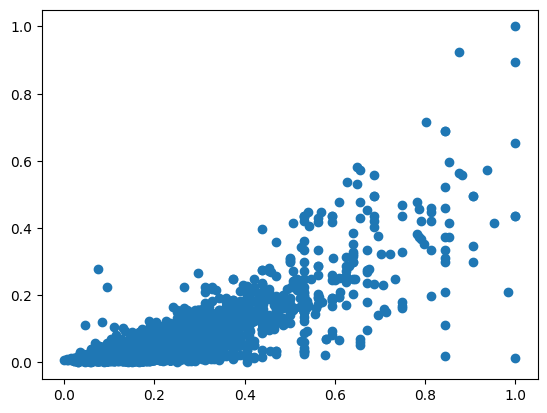

In [230]:
plt.scatter(df.Area,df.Price)

In [231]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [232]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Room','Parking' ]])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.52930814 -0.11497695  0.00535547]]


In [233]:
y_hat= regr.predict(test[['Area', 'Room','Parking' ]])
x = np.asanyarray(test[['Area', 'Room','Parking' ]])
y = np.asanyarray(test[['Price']])

print('Variance score: %.2f' % regr.score(x, y))
mse = mean_squared_error(y, y_hat)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y, y_hat)
print("Mean Absolute Error (MAE):", mae)

Variance score: 0.70
Mean Squared Error (MSE): 0.002330964552131439
Mean Absolute Error (MAE): 0.029526235988591006


c:\Users\Abbasian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


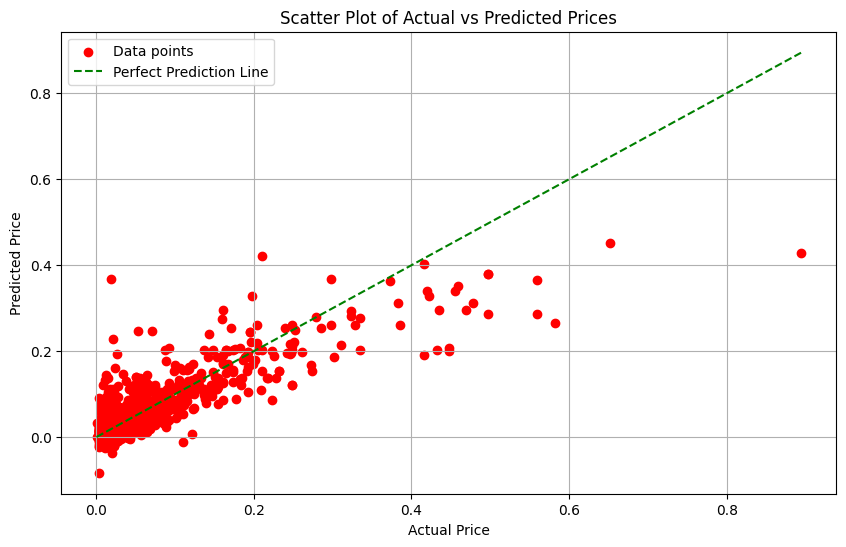

In [234]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_hat, color='red', label='Data points')

plt.plot([min(y), max(y)], [min(y), max(y)], color='green', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()